In [43]:
import matplotlib.pyplot as plt; import numpy as np; import pylab; import os; import plotly.plotly as py;
import plotly.tools as tls
from statsmodels import robust


In [44]:
# First create a speciment list to read in all the data files. 
# Function to create a list of specimen names from the specimen key file. 
def parse_specimen_key():
    data = [];a=[];b=[];c=[];d=[];e=[];f=[];g=[];h=[];i=[];j=[];k=[];l=[];
    f = open("Specimen Key.txt",'r')
    for line in f: data.append(line)
    f.close()   
    for i in range(len(data)):
        a1,b1,c1,d1,e1,f1,g1,h1,i1,j1,k1,l1 = data[i].split(",")
        h.append(h1)  
    del h[0]; return (h)

specimen__name_list = parse_specimen_key()

In [45]:
# Build filename for look up file in raw data
def build_filename(specimen_name, measurement_type):
    filename = (specimen_name + measurement_type + ".txt")
    filename = os.path.join("Raw_Data","Editted Filenames", filename)
    
    return(filename)

In [46]:
# Function to create a parse the voltage and current from .txt data files. 
def parse_data(filename):
    data = []; time = []; voltage = []; current = [];
    f = open(filename,'r')
    for line in f: data.append(line)
    f.close()   
    for i in range(len(data)):
        t, v, c = data[i].split(",")
        time.append(float(t))
        voltage.append(float(v))
        current.append(float(c)) 
        
    return (time, voltage, current)

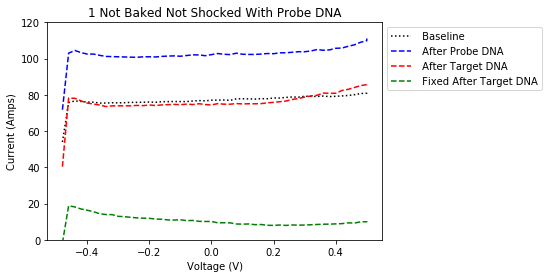

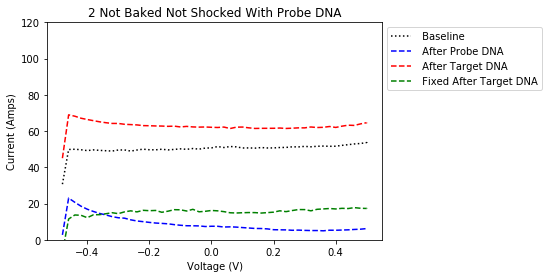

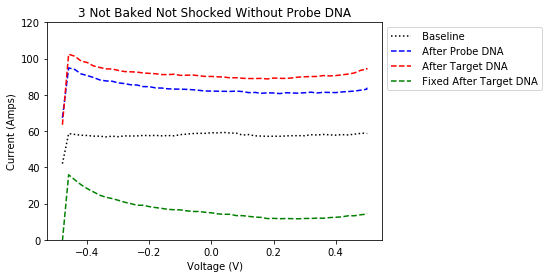

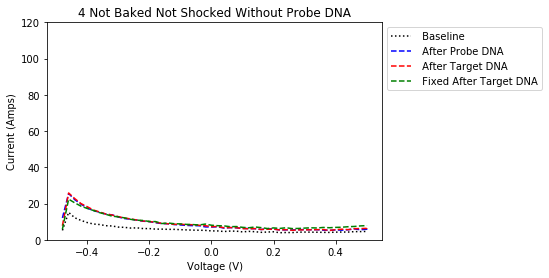

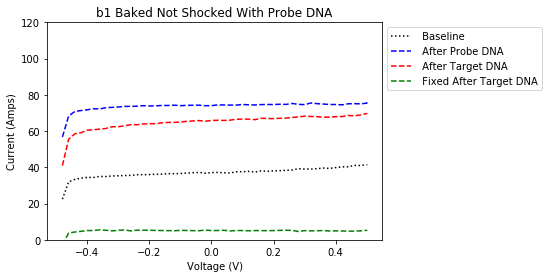

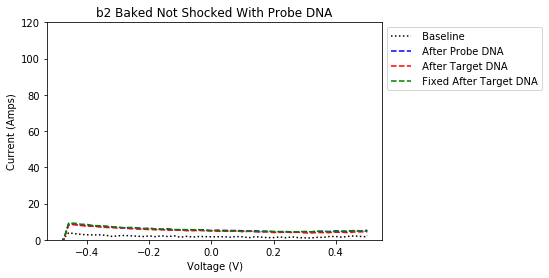

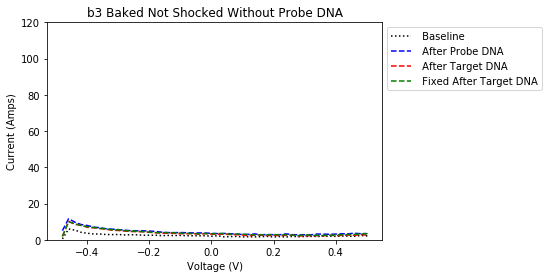

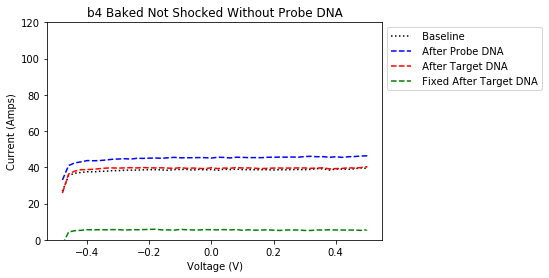

In [47]:
# Graph each specimen to observe general trends during the epxeriment. 
# Identify conclusive datasets for further analysis. 

# Function to plot the voltage vs current
def plot_data(specimen_name_list):    
    measurement_type = [" Baseline", " After Probe DNA", " After Target DNA"," Fixed After Target DNA"]
    plot_color = ["black","blue","red","green"]
    plot_linestyle = [":","--","--","--"]
        
    for k in range(len(specimen_name_list)): 
        specimen_name = specimen_name_list[k]
        
        for j in range(1):        
            for i in range(len(measurement_type)): 
                filename = build_filename(specimen_name, measurement_type[i])      
                time, voltage, current = parse_data(filename)
                plt.plot(voltage, current, color=plot_color[i], linestyle=plot_linestyle[i], label=measurement_type[i])
                pylab.legend(loc='upper left',bbox_to_anchor=(1,1))
  
            plt.xlabel('Voltage (V)'); 
            plt.ylabel('Current (Amps)'); plt.ylim((0,120))
            plt.title(specimen_name)
        
            filename = os.path.join("Figures","Each Electrode", specimen_name + '.jpg')
            plt.savefig(filename, bbox_inches='tight') 
            plt.show()  
        
plot_data(specimen__name_list)

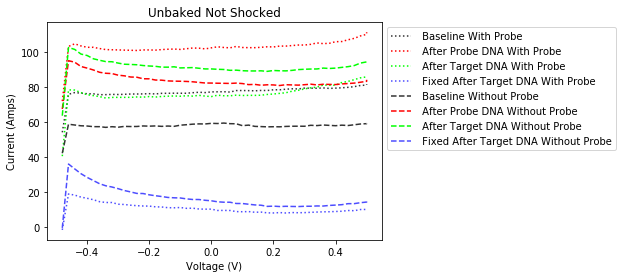

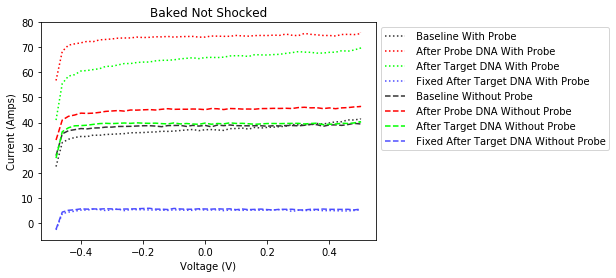

In [48]:
# Function to plot the voltage vs current
def plot_data(specimen_name_list, title):    
    measurement_type = [" Baseline", " After Probe DNA", " After Target DNA"," Fixed After Target DNA"]
    plot_color = [[.2,.2,.2],[1,0,0],[0,1,0],[.3,.3,1]]
    plot_linestyle = [":","--"]
    probe_variable = [" With Probe"," Without Probe"]
        
    for k in range(len(specimen_name_list)): 
        specimen_name = specimen_name_list[k]
        
        for j in range(1):        
            for i in range(len(measurement_type)): 
                filename = build_filename(specimen_name, measurement_type[i])      
                time, voltage, current = parse_data(filename)
                label_name = (measurement_type[i] + probe_variable[k])    
                plt.plot(voltage, current, color=plot_color[i], linestyle=plot_linestyle[k], label=label_name)
                pylab.legend(loc='upper left',bbox_to_anchor=(1,1))
  
    plt.xlabel('Voltage (V)'); 
    plt.ylabel('Current (Amps)'); #plt.ylim((0,120))
    plt.title(title)
        
    filename = os.path.join("Figures","Comparison with and without Prbe DNA", specimen_name + '.jpg')
    plt.savefig(filename, bbox_inches='tight')  
    plt.show()  
 
specimen_short_list = specimen__name_list

unbaked_short_list = [specimen_short_list[0],specimen_short_list[2]]
plot_data(unbaked_short_list, "Unbaked Not Shocked")

unbaked_short_list = [specimen_short_list[4],specimen_short_list[7]]
plot_data(unbaked_short_list, "Baked Not Shocked")


In [66]:
# Whisker plot of voltage 
def mad(arr):
    """ Median Absolute Deviation: a "Robust" version of standard deviation.
        Indices variabililty of the sample.
        https://en.wikipedia.org/wiki/Median_absolute_deviation 
    """
    arr = np.ma.array(arr).compressed() # should be faster to not use masked arrays.
    med = np.median(arr)
    return np.median(np.abs(arr - med))


def whisker_plot_data(specimen_name_list):    
    measurement_type = [" Baseline", " After Probe DNA", " After Target DNA"," Fixed After Target DNA"]  
    
    currents = [];
    number = 1;
    i = 1;
    

    for k in range(3):    
        specimen_name = specimen_name_list[k]             
        filename = build_filename(specimen_name, measurement_type[i])
        print(filename)
        
        time, voltage, current = parse_data(filename)
        print()
        currents = [currents, current]
        del currents[0]
        print(currents)

        sample_number = [n * 0 + number for n in current]; number = number+1;
              
            
        plt.figure()
        plt.scatter(sample_number, current, color = [.9,.9,.9])
    
    plt.boxplot(currents)
    
    fig, ax = plt.subplots()
    pos = np.array(range(len(currents))) + 1
    bp = ax.boxplot(currents, sym='k+', positions=pos,
                notch=1, bootstrap=5000,
                usermedians=medians,
                conf_intervals=conf_intervals)
  
    plt.xlabel('Specimen Type'); 
    plt.ylabel('Current (Amps)'); #plt.ylim((0,120))
        
    filename = os.path.join("Figures","Whisker Plots", specimen_name + '.jpg')
    plt.savefig(filename) 
    plt.show()  
 


whisker_plot_data(specimen__name_list)


Raw_Data/Editted Filenames/1 Not Baked Not Shocked With Probe DNA After Probe DNA.txt
[[71.79, 103.0, 104.5, 103.3, 102.5, 102.5, 101.8, 101.2, 101.1, 101.0, 100.9, 100.8, 100.7, 101.0, 101.0, 100.9, 101.2, 101.4, 101.5, 101.3, 101.7, 102.1, 102.0, 101.6, 102.2, 102.8, 102.4, 102.2, 103.0, 102.4, 102.3, 102.3, 102.5, 102.8, 102.7, 103.2, 103.2, 103.5, 103.8, 103.8, 104.2, 105.0, 104.6, 104.8, 105.7, 105.8, 106.8, 107.6, 109.0, 109.9, 111.1]]
Raw_Data/Editted Filenames/2 Not Baked Not Shocked With Probe DNA After Probe DNA.txt
[[2.707, 23.03, 20.68, 18.53, 16.88, 15.62, 14.53, 13.71, 12.79, 12.16, 11.94, 11.02, 10.38, 10.01, 9.602, 9.254, 9.051, 8.822, 8.366, 8.023, 7.758, 7.733, 7.662, 7.325, 7.478, 7.457, 7.049, 7.147, 7.008, 6.741, 6.507, 6.259, 6.223, 6.02, 5.573, 5.511, 5.469, 5.255, 5.347, 5.195, 5.108, 5.107, 4.963, 5.295, 5.261, 5.384, 5.495, 5.713, 5.861, 6.194, 6.23]]
Raw_Data/Editted Filenames/3 Not Baked Not Shocked Without Probe DNA After Probe DNA.txt
[[67.31, 94.86, 93.99

NameError: name 'medians' is not defined